In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import seaborn as sns
from enum import Enum
sns.set_theme(style="ticks")

In [56]:
class In(Enum):
    SINGAPORE = 0
    SAN_FRANCISCO = 1
    COSTS = 2
    DIST = 3

### import data

In [60]:
cols = ["districts", "dist_public", "dist_driving", "dist_walking", "dist_cycling", "cost_bus","cost_subway", "cost_driving", "cost_cycling", "cost_walking"]

def read_sheet(city):
    if city == In.SINGAPORE:
        header=2
        nrows=31
    else:
        header=38
        nrows=37
    df = pd.read_excel("sheets/mobility_qol.xlsx", sheet_name=0, header=header, usecols="E, I:Q", nrows=nrows)
    df.columns = cols
    df.drop(0, inplace=True)

    return df 

In [62]:
sing_df = read_sheet(In.SINGAPORE)
sf_df = read_sheet(In.SAN_FRANCISCO)
sf_df.head()

,districts,dist_public,dist_driving,dist_walking,dist_cycling,cost_bus,cost_subway,cost_driving,cost_cycling,cost_walking
1,Bernal Heights,3.938473,26.517003,1.940619,5.829403,0.09,0.09,0.28,0.44,0.51
2,Castro/Upper Market,0.000000,0.000000,0.000000,0.000000,0.10,0.10,0.27,0.43,0.57
3,Chinatown,1.179977,15.022439,2.281854,7.834494,0.09,0.09,0.28,0.21,0.23
4,Crocker Amazon,5.642908,21.725930,2.340712,5.078145,0.08,0.08,0.29,0.48,0.48
5,Diamond Heights/Glen Park,8.617236,24.357509,2.215848,5.767667,0.09,0.09,0.28,0.48,0.55


### scatterplot matrix

In [63]:
def distance_plot(df, type=None):
    if type == In.COSTS:
        an_df = df.iloc[:, 5:]
    elif type == In.DIST:
        an_df = df.iloc[:, 1:5]
    else:
        an_df = df.iloc[:, 1:]

    s = sns.pairplot(an_df)
    return s

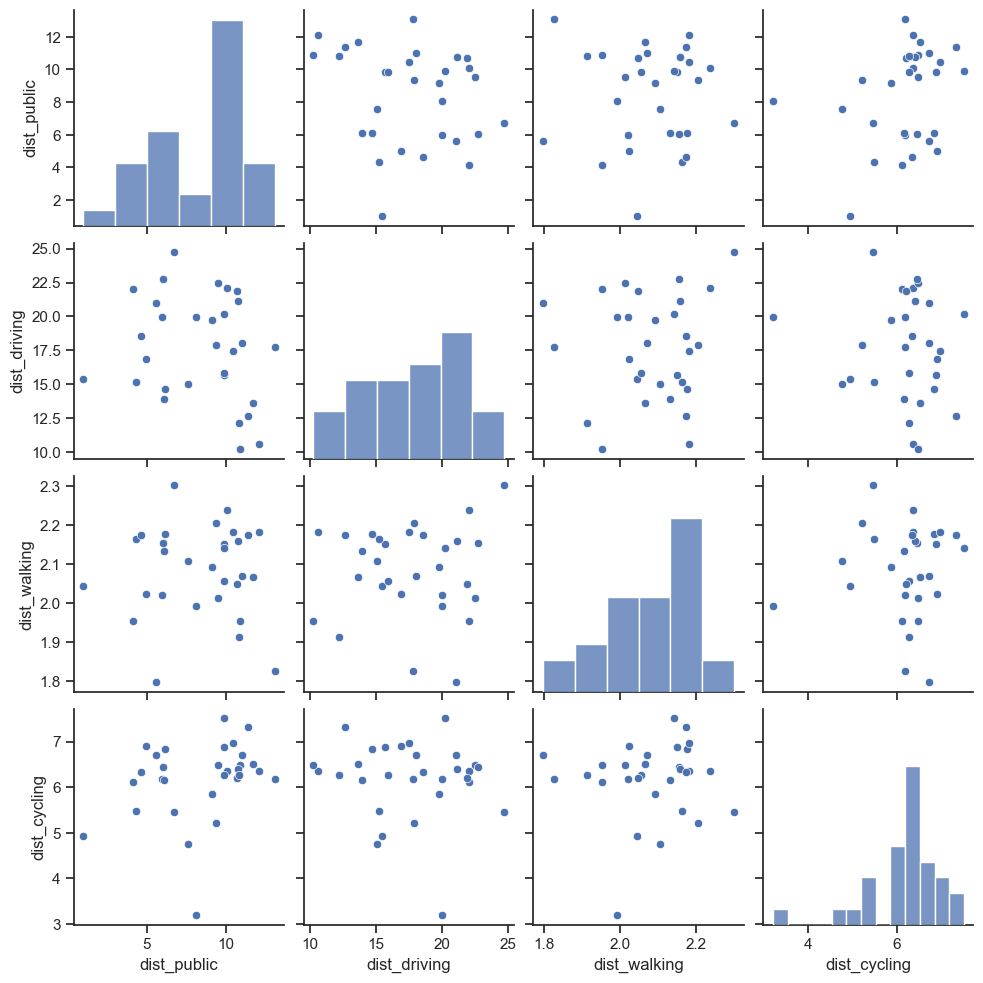

In [64]:
distance_plot(sing_df, In.DIST)
# distance_plot(sf_df, "costs")